In [ ]:
# Challenge 12.3 SVD method (More efficient than solving nonlinear least squares)

import numpy as np

def rotation_matrix(phi, theta, psi):
    Q_yaw = np.array([[np.cos(phi), np.sin(phi), 0],
                      [-np.sin(phi), np.cos(phi), 0],
                      [0, 0, 1]])
    Q_pitch = np.array([[np.cos(theta), 0, -np.sin(theta)],
                        [0, 1, 0],
                        [np.sin(theta), 0, np.cos(theta)]])
    Q_roll = np.array([[1, 0, 0],
                       [0, np.cos(psi), np.sin(psi)],
                       [0, -np.sin(psi), np.cos(psi)]])
    return Q_roll @ Q_pitch @ Q_yaw

# Given matrix A
A = np.array([[0, 0, 1, 1, 0, -1, 0],
              [0, 1, 1, 0, 0, 1, 2],
              [0, 1, 2, 3, 4, 4, 4]])

# Known rotation angles
phi_true = np.pi / 4
theta_true = np.pi / 9
psi_true = np.pi / 6

# Generate B from A
Q_true = rotation_matrix(phi_true, theta_true, psi_true)
B = Q_true @ A

# Apply SVD to BA^T
BA_T = B @ A.T
U, _, Vt = np.linalg.svd(BA_T)
Q_opt = U @ Vt

# Compute B estimate using Q_opt
B_est = Q_opt @ A

# Calculate errors
Q_error = np.linalg.norm(Q_true - Q_opt, 'fro')
rmsd = np.sqrt(np.mean(np.sum((B - B_est) ** 2, axis=0)))

Q_opt, Q_error, rmsd



(array([[ 0.66446302,  0.66446302, -0.34202014],
        [-0.49145005,  0.73329482,  0.46984631],
        [ 0.5629971 , -0.14410968,  0.81379768]]),
 np.float64(1.1853938111129682e-15),
 np.float64(1.4438998158058274e-15))

Hence error is much smaller as compared to LSM which has error of 10^-7 whereas for SVD it is 10^-16 and rmsd is much Smaller ehich shows the accuracy

 challenge 4 

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
np.random.seed(42)

# Define Euler rotation matrix
def rotation_matrix(phi, theta, psi):
    Q_yaw = np.array([[np.cos(phi), np.sin(phi), 0],
                      [-np.sin(phi), np.cos(phi), 0],
                      [0, 0, 1]])
    Q_pitch = np.array([[np.cos(theta), 0, -np.sin(theta)],
                        [0, 1, 0],
                        [np.sin(theta), 0, np.cos(theta)]])
    Q_roll = np.array([[1, 0, 0],
                       [0, np.cos(psi), np.sin(psi)],
                       [0, -np.sin(psi), np.cos(psi)]])
    return Q_roll @ Q_pitch @ Q_yaw

# Original matrix A 
A = np.array([[0, 0, 1, 1, 0, -1, 0],
              [0, 1, 1, 0, 0, 1, 2],
              [0, 1, 2, 3, 4, 4, 4]])
phi_true = np.pi / 4
psi_true = np.pi / 9
theta_values = np.linspace(-np.pi/2, np.pi/2, 120)

# Function to generate B from A and angles
def generate_B(A, phi, theta, psi):
    return rotation_matrix(phi, theta, psi) @ A

# Objective function for optimization
def objective(angles, A, B):
    phi, theta, psi = angles
    Q = rotation_matrix(phi, theta, psi)
    return np.sum((B - Q @ A) ** 2)

# Initialize data containers
estimated_yaw, estimated_pitch, estimated_roll = [], [], []
Q_errors_ch2, pos_errors_ch2 = [], []
Q_errors_ch4, pos_errors_ch4 = [], []

# Challenge 2: Nonlinear optimization for each theta
for theta in theta_values:
    B = generate_B(A, phi_true, theta, psi_true)
    res = minimize(objective, [0.1, 0.1, 0.1], args=(A, B))
    phi_opt, theta_opt, psi_opt = res.x
    Q_opt = rotation_matrix(phi_opt, theta_opt, psi_opt)
    Q_true = rotation_matrix(phi_true, theta, psi_true)
    B_est = Q_opt @ A

    estimated_yaw.append(phi_opt)
    estimated_pitch.append(theta_opt)
    estimated_roll.append(psi_opt)
    Q_errors_ch2.append(np.linalg.norm(Q_true - Q_opt, 'fro'))
    pos_errors_ch2.append(np.sqrt(np.mean(np.sum((B - B_est)**2, axis=0))))

# Challenge 4: Using SVD
for theta in theta_values:
    B = generate_B(A, phi_true, theta, psi_true)
    BA_T = B @ A.T
    U, _, Vt = np.linalg.svd(BA_T)
    Q_svd = U @ Vt
    Q_true = rotation_matrix(phi_true, theta, psi_true)
    B_est = Q_svd @ A
    Q_errors_ch4.append(np.linalg.norm(Q_true - Q_svd, 'fro'))
    pos_errors_ch4.append(np.sqrt(np.mean(np.sum((B - B_est)**2, axis=0))))




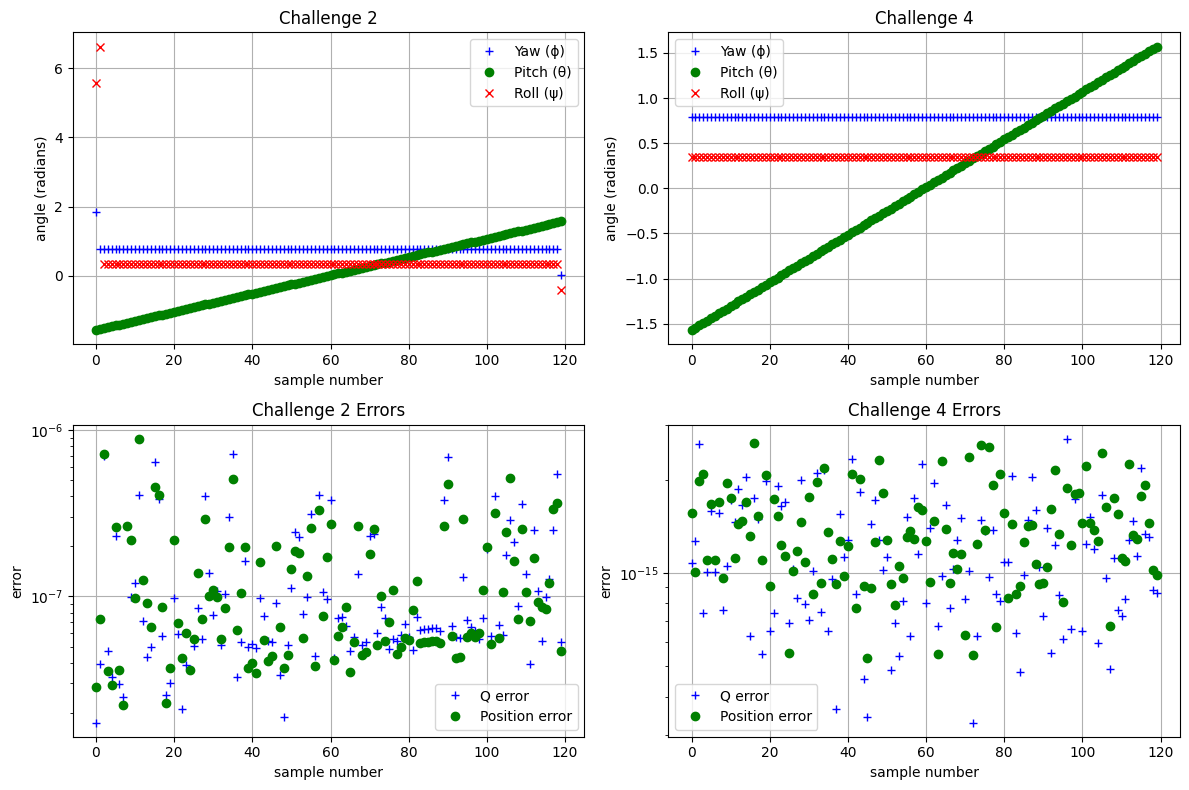

In [2]:
# Plot the 4-panel comparison
sample_numbers = np.arange(len(theta_values))
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Top Left: Challenge 2 - estimated angles
axs[0, 0].plot(sample_numbers, estimated_yaw, 'b+', label='Yaw (ϕ)')
axs[0, 0].plot(sample_numbers, estimated_pitch, 'go', label='Pitch (θ)')
axs[0, 0].plot(sample_numbers, estimated_roll, 'rx', label='Roll (ψ)')
axs[0, 0].set_title("Challenge 2")
axs[0, 0].set_ylabel("angle (radians)")
axs[0, 0].set_xlabel("sample number")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Top Right: Challenge 4 - true angles (ideal SVD)
axs[0, 1].plot(sample_numbers, [phi_true]*len(sample_numbers), 'b+', label='Yaw (ϕ)')
axs[0, 1].plot(sample_numbers, theta_values, 'go', label='Pitch (θ)')
axs[0, 1].plot(sample_numbers, [psi_true]*len(sample_numbers), 'rx', label='Roll (ψ)')
axs[0, 1].set_title("Challenge 4")
axs[0, 1].set_ylabel("angle (radians)")
axs[0, 1].set_xlabel("sample number")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Bottom Left: Challenge 2 errors
axs[1, 0].semilogy(sample_numbers, Q_errors_ch2, 'b+', label='Q error')
axs[1, 0].semilogy(sample_numbers, pos_errors_ch2, 'go', label='Position error')
axs[1, 0].set_title("Challenge 2 Errors")
axs[1, 0].set_ylabel("error")
axs[1, 0].set_xlabel("sample number")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Bottom Right: Challenge 4 errors
axs[1, 1].semilogy(sample_numbers, Q_errors_ch4, 'b+', label='Q error')
axs[1, 1].semilogy(sample_numbers, pos_errors_ch4, 'go', label='Position error')
axs[1, 1].set_title("Challenge 4 Errors")
axs[1, 1].set_ylabel("error")
axs[1, 1].set_xlabel("sample number")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

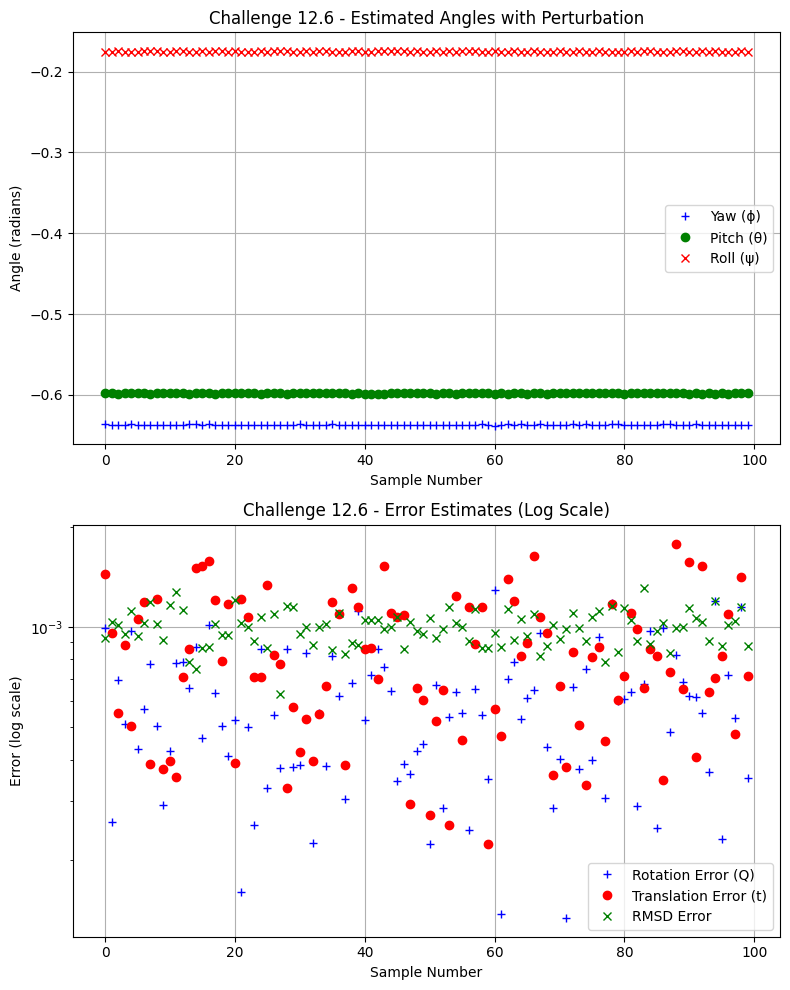

In [3]:
def compute_svd_alignment(A, B):
    c_A = np.mean(A, axis=1, keepdims=True)
    c_B = np.mean(B, axis=1, keepdims=True)

    BA_T = (B - c_B) @ (A - c_A).T
    U, _, Vt = np.linalg.svd(BA_T)
    Q_opt = U @ Vt

    # Ensure a proper rotation matrix
    if np.linalg.det(Q_opt) < 0:
        U[:, -1] *= -1
        Q_opt = U @ Vt

    t_opt = c_B - Q_opt @ c_A
    return Q_opt, t_opt

# Compute error metrics
def compute_errors(Q_true, Q_opt, t_true, t_opt, B, B_est):
    Q_error = np.linalg.norm(Q_true - Q_opt, 'fro')
    t_error = np.linalg.norm(t_true - t_opt)
    rmsd = np.sqrt(np.mean(np.sum((B - B_est) ** 2, axis=0)))
    return Q_error, t_error, rmsd

# Experiment setup
def experiment(n_trials=100, perturbation=1e-3):
    A = np.array([[0, 0, 1, 1, 0, -1, 0],
                  [0, 1, 1, 0, 0, 1, 2],
                  [0, 1, 2, 3, 4, 4, 4]])

    # True rotation and translation
    phi_true, theta_true, psi_true = np.pi / 4, np.pi / 9, np.pi / 6
    Q_true = rotation_matrix(phi_true, theta_true, psi_true)
    t_true = np.array([[0.5], [-0.3], [0.2]])  # Example translation
    B = Q_true @ A + t_true

    estimated_yaw, estimated_pitch, estimated_roll = [], [], []
    Q_errors, t_errors, rmsd_values = [], [], []
    sample_numbers = np.arange(n_trials)

    for _ in range(n_trials):
        # Apply perturbation
        A_perturbed = A + np.random.uniform(-perturbation, perturbation, A.shape)
        B_perturbed = B + np.random.uniform(-perturbation, perturbation, B.shape)

        # Compute estimated transformation
        Q_opt, t_opt = compute_svd_alignment(A_perturbed, B_perturbed)
        B_est = Q_opt @ A_perturbed + t_opt

        # Compute errors
        Q_error, t_error, rmsd = compute_errors(Q_true, Q_opt, t_true, t_opt, B, B_est)

        # Extract estimated Euler angles
        phi_est = np.arctan2(Q_opt[1, 0], Q_opt[0, 0])
        theta_est = np.arcsin(-Q_opt[2, 0])
        psi_est = np.arctan2(Q_opt[2, 1], Q_opt[2, 2])

        estimated_yaw.append(phi_est)
        estimated_pitch.append(theta_est)
        estimated_roll.append(psi_est)
        Q_errors.append(Q_error)
        t_errors.append(t_error)
        rmsd_values.append(rmsd)

    # Plot results
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # Top Plot: Estimated angles
    axs[0].plot(sample_numbers, estimated_yaw, 'b+', label='Yaw (ϕ)')
    axs[0].plot(sample_numbers, estimated_pitch, 'go', label='Pitch (θ)')
    axs[0].plot(sample_numbers, estimated_roll, 'rx', label='Roll (ψ)')
    axs[0].set_title("Challenge 12.6 - Estimated Angles with Perturbation")
    axs[0].set_ylabel("Angle (radians)")
    axs[0].set_xlabel("Sample Number")
    axs[0].legend()
    axs[0].grid(True)

    # Bottom Plot: Error estimates (log scale)
    axs[1].semilogy(sample_numbers, Q_errors, 'b+', label='Rotation Error (Q)')
    axs[1].semilogy(sample_numbers, t_errors, 'ro', label='Translation Error (t)')
    axs[1].semilogy(sample_numbers, rmsd_values, 'gx', label='RMSD Error')
    axs[1].set_title("Challenge 12.6 - Error Estimates (Log Scale)")
    axs[1].set_ylabel("Error (log scale)")
    axs[1].set_xlabel("Sample Number")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Run the experiment and plot results
experiment()

NameError: name 'Slider' is not defined

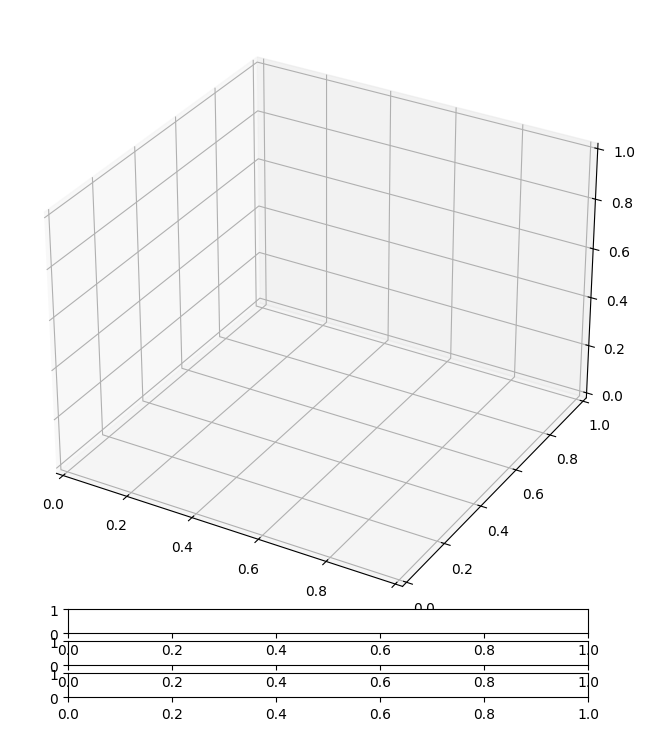

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
from matplotlib.widgets import Slider

def create_ring(axis, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    if axis == 'x':
        return np.zeros_like(theta), np.cos(theta), np.sin(theta)
    elif axis == 'y':
        return np.cos(theta), np.zeros_like(theta), np.sin(theta)
    elif axis == 'z':
        return np.cos(theta), np.sin(theta), np.zeros_like(theta)

def rotate_ring(x, y, z, yaw, pitch, roll):
    points = np.vstack([x, y, z])
    r = R.from_euler('zyx', [yaw, pitch, roll], degrees=True)
    rotated_points = r.apply(points.T).T
    return rotated_points[0], rotated_points[1], rotated_points[2]

def update(val):
    yaw = yaw_slider.val
    pitch = pitch_slider.val
    roll = roll_slider.val
    
    ax.clear()
    for axis in ['x', 'y', 'z']:
        x, y, z = create_ring(axis)
        x_rot, y_rot, z_rot = rotate_ring(x, y, z, yaw, pitch, roll)
        ax.plot(x_rot, y_rot, z_rot, label=f'{axis}-ring')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.draw()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax_slider_yaw = plt.axes([0.2, 0.02, 0.65, 0.03])
ax_slider_pitch = plt.axes([0.2, 0.06, 0.65, 0.03])
ax_slider_roll = plt.axes([0.2, 0.10, 0.65, 0.03])

yaw_slider = Slider(ax_slider_yaw, 'Yaw', -180, 180, valinit=0)
pitch_slider = Slider(ax_slider_pitch, 'Pitch', -180, 180, valinit=0)
roll_slider = Slider(ax_slider_roll, 'Roll', -180, 180, valinit=0)

yaw_slider.on_changed(update)
pitch_slider.on_changed(update)
roll_slider.on_changed(update)

update(None)  # Initial plot
plt.show()